## **Loading Data from kaggle**

Dataset Link: https://www.kaggle.com/datasets/rifdana/cataract-photo-image-dataset/code

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d rifdana/cataract-photo-image-dataset

Dataset URL: https://www.kaggle.com/datasets/rifdana/cataract-photo-image-dataset
License(s): CC-BY-SA-4.0
 99% 36.0M/36.2M [00:03<00:00, 18.4MB/s]
100% 36.2M/36.2M [00:03<00:00, 10.7MB/s]


In [4]:
import zipfile
zip = zipfile.ZipFile("/content/cataract-photo-image-dataset.zip",'r')
zip.extractall("/content")
zip.close()

In [5]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import pathlib
%matplotlib inline

## **Data Preprocessing**

In [17]:
batch_size = 32
img_height = 256
img_width = 256

In [15]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/Dataset/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/Dataset/valid',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 1753 files belonging to 3 classes.
Found 714 files belonging to 3 classes.


In [16]:
class_names = train_ds.class_names
print(class_names)

['Immature', 'Mature', 'Normal']


In [20]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

## **Data Visualization**

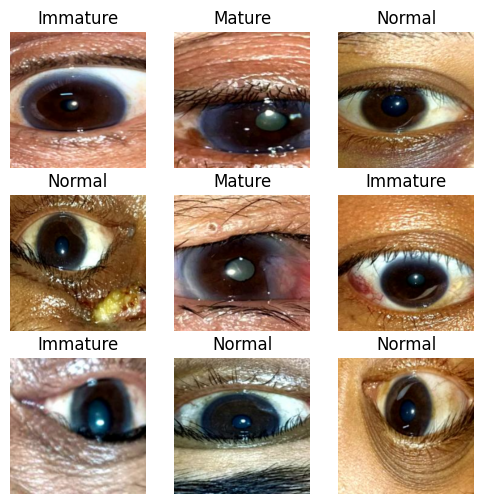

In [19]:
plt.figure(figsize=(6,6))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis('off')

## **Model Building**

In [21]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(3,activation='sigmoid'))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

## **Model Training**

In [23]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [25]:
history = model.fit(train_ds, epochs = 50, validation_data=(validation_ds))

Epoch 1/50
55/55 [==============================] - 8s 144ms/step - loss: 0.5261 - accuracy: 0.8871 - val_loss: 2.2532 - val_accuracy: 0.6611
Epoch 2/50
55/55 [==============================] - 9s 145ms/step - loss: 0.3336 - accuracy: 0.9161 - val_loss: 1.3469 - val_accuracy: 0.7353
Epoch 3/50
55/55 [==============================] - 7s 130ms/step - loss: 0.1601 - accuracy: 0.9281 - val_loss: 0.4885 - val_accuracy: 0.8711
Epoch 4/50
55/55 [==============================] - 6s 107ms/step - loss: 0.1965 - accuracy: 0.9378 - val_loss: 0.4330 - val_accuracy: 0.8992
Epoch 5/50
55/55 [==============================] - 6s 108ms/step - loss: 0.1919 - accuracy: 0.9464 - val_loss: 1.0745 - val_accuracy: 0.7787
Epoch 6/50
55/55 [==============================] - 6s 112ms/step - loss: 0.1293 - accuracy: 0.9509 - val_loss: 0.6444 - val_accuracy: 0.8936
Epoch 7/50
55/55 [==============================] - 7s 116ms/step - loss: 0.1006 - accuracy: 0.9681 - val_loss: 1.4152 - val_accuracy: 0.7507
Epoch 

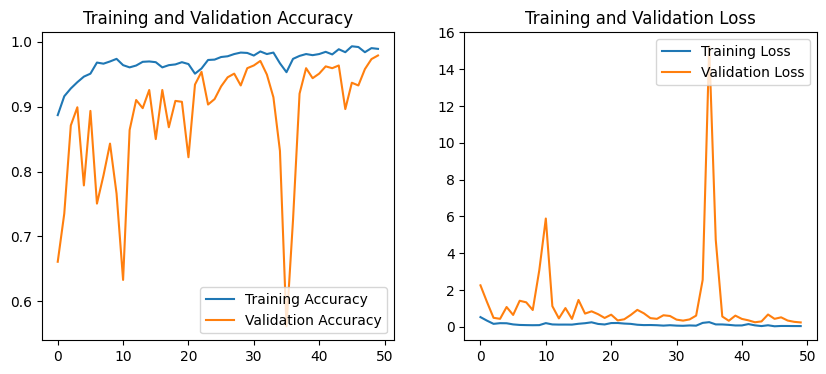

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = 50
epochs_range = range(epochs)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


## **Prediction**

1/1 [==============================] - 0s 18ms/step


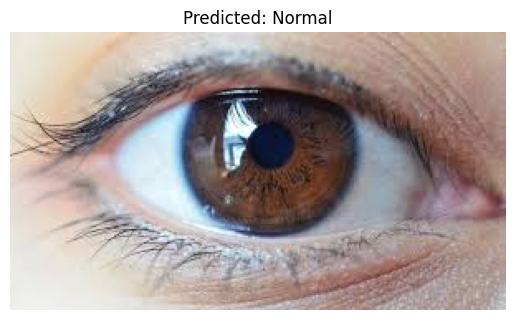

In [45]:
from tensorflow.keras.preprocessing import image
# Path to the random image
random_image_path = '/content/img_4.jpg'

# Load and preprocess the image
def load_and_preprocess_image(image_path, img_height, img_width):
    img = image.load_img(image_path, target_size=(img_height, img_width))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img_array

# Make a prediction using the model
def predict_image(model, img_array, class_names):
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_names[predicted_class]
    return predicted_class_name, predictions[0]

# Display the prediction results
def display_prediction(image_path, predicted_class_name):
    img = image.load_img(image_path)
    plt.imshow(img)
    plt.title(f'Predicted: {predicted_class_name}')
    plt.axis('off')
    plt.show()

# Load and preprocess the image
img_array = load_and_preprocess_image(random_image_path, img_height, img_width)

# Predict the class of the image
predicted_class_name, _ = predict_image(model, img_array, class_names)

# Display the prediction results
display_prediction(random_image_path, predicted_class_name)


1/1 [==============================] - 0s 27ms/step


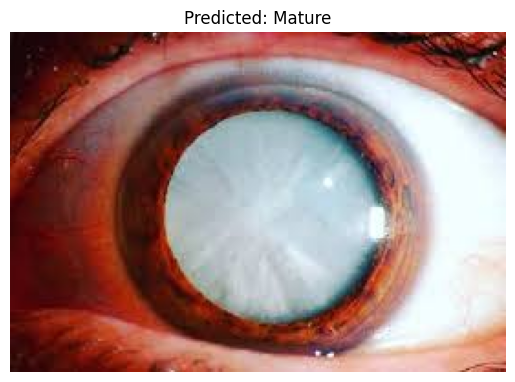

In [47]:
random_image_path_3 = '/content/img_5.jpg'
# Load and preprocess the image
img_array = load_and_preprocess_image(random_image_path_3, img_height, img_width)

# Predict the class of the image
predicted_class_name, _ = predict_image(model, img_array, class_names)

# Display the prediction results
display_prediction(random_image_path_3, predicted_class_name)

## **Test Accuracy**

In [48]:
test_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/Dataset/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)
test_ds = test_ds.map(process)
test_loss, test_accuracy = model.evaluate(test_ds)

print("Test Accuracy:", test_accuracy)

Found 760 files belonging to 3 classes.
24/24 [==============================] - 3s 102ms/step - loss: 0.2728 - accuracy: 0.9632
Test Accuracy: 0.9631578922271729
